In [1]:
import pandas as pd

### Reading the Multisource Temperature file _ after Preprocess


In [2]:
# Read the Global Temperature multisource Excel file and the NOAA sheet
file_path = '/data/keeling/a/sudhansu/i/GlobalTempChange/GlobalTemprature_MultiSource.xlsx'
df_noaa = pd.read_excel(file_path, sheet_name='NOAA', usecols="A:B")

# Display the first few rows of the dataframe
df_noaa
# Adjustment = Anerage anomaly 1950-1980
df_base_noaa = df_noaa[(df_noaa['Year'] >= 1850) & (df_noaa['Year'] <= 1900)]
Adjustment = df_base_noaa['Anomaly(1901-2000 baseline)'].mean()
Adjustment
df_noaa['Anomaly(1850-1900 baseline)'] = df_noaa['Anomaly(1901-2000 baseline)'] - Adjustment
# df_noaa
Adjustment
anomaly_df = pd.DataFrame(df_noaa['Anomaly(1850-1900 baseline)'])

# Display the DataFrame in a tabular format
# anomaly_df.to_excel('temp.xlsx', index=False)
# anomaly_df


### 11-Year Centered Average starting at 1855
### 21-Year Centered Average starting at 1860
### 31-Year Centered Average starting at 1865
### 15-year rolling Linear Regression and pick the slope , intercept for 2024
### computation of new anomaly 2025 onwards using slope and intercept of 2024 (Assuming a linear trend)
### create new df including missing values of 2025 till 2100 and fill the 11,21, and 31-year centered average till 2085

In [3]:
from scipy.stats import linregress
from datetime import datetime


# Initialize lists to store the slopes and intercepts
slopes = []
intercepts = []
start_year = 1996
index0_year = 1849
# Define the rolling window size
window_size = 15
new_values = {}
# Loop through the dataframe starting from 1995
for start_year in range(1996, df_noaa['Year'].max() - window_size + 2):
    end_year = start_year + window_size - 1
    df_window = df_noaa[(df_noaa['Year'] >= start_year) & (df_noaa['Year'] <= end_year)]
    # print(f"Start Year: {start_year}, End Year: {end_year}")
    # print(df_window.index)
    # Perform linear regression
    slope, intercept, _, _, _ = linregress(df_window.index+1, df_window['Anomaly(1850-1900 baseline)'])
    
    # Append the results to the lists
    slopes.append(slope)
    intercepts.append(intercept)

# Create a new dataframe to store the results
df_rolling_regression = pd.DataFrame({
    'Start Year': range(1996, df_noaa['Year'].max() - window_size + 2),
    'End Year': range(1996 + window_size - 1, df_noaa['Year'].max() + 1),
    'Slope': slopes,
    'Intercept': intercepts
})

# Display the dataframe
df_rolling_regression
# For Method2: Only working with 15 year slope and intercept values from "df_rolling_regression" for the ending year-2024
#   The absolute Global Mean Temperature for year 2025 is calculated by using the slope and intercept values for the year 2024

# Extract the slope and intercept values for the year 2024
slope_2024 = df_rolling_regression[df_rolling_regression['End Year'] == 2024]['Slope'].values[0]
intercept_2024 = df_rolling_regression[df_rolling_regression['End Year'] == 2024]['Intercept'].values[0]

# Calculate the absolute Global Mean Temperature for the year 2025


In [16]:
df_rolling_regression

,Start Year,End Year,Slope,Intercept
0,1996,2010,0.019143,-2.199608
1,1997,2011,0.013857,-1.381465
2,1998,2012,0.012607,-1.188989
3,1999,2013,0.015250,-1.613191
4,2000,2014,0.013429,-1.317322
5,2001,2015,0.014357,-1.444394
6,2002,2016,0.020214,-2.363894
7,2003,2017,0.024107,-2.989525
8,2004,2018,0.025393,-3.205917
9,2005,2019,0.026571,-3.395417


In [ ]:
# slope_2024 = round(slope_2024,9 )
# intercept_2024 = round(intercept_2024,9)

# new = (2025-1849)*slope_2024 + intercept_2024
# new = round(new, 9)
# print(slope_2024, intercept_2024,new)

In [4]:
# Initialize a list to store the new anomaly values
new_anomalies = []

# Compute the anomaly values for the years 2025 to 2100
for year in range(2025, 2101):
    anomaly = slope_2024 * (year - index0_year) + intercept_2024
    new_anomalies.append({'Year': year, 'Anomaly(1850-1900 baseline)': anomaly})

# Convert the list to a DataFrame
df_new_anomalies = pd.DataFrame(new_anomalies)

# Append the new anomaly values to the existing df_noaa DataFrame
df_noaa = pd.concat([df_noaa, df_new_anomalies], ignore_index=True)

# Compute the 11-year centered average
df_noaa['11yr_centered_avg'] = df_noaa['Anomaly(1850-1900 baseline)'].rolling(window=11, center=True).mean()

# Compute the 21-year centered average
df_noaa['21yr_centered_avg'] = df_noaa['Anomaly(1850-1900 baseline)'].rolling(window=21, center=True).mean()
# Compute the 31-year centered average starting at 2010 onwards
df_noaa['31yr_centered_avg'] = df_noaa['Anomaly(1850-1900 baseline)'].rolling(window=31, center=True).mean()
# Display the updated DataFrame

# df_noaa.to_excel('temp.xlsx', index=False)
df_noaa.tail(50)
# df_new_anomalies
# print(slope_2024, intercept_2024,new)

,Year,Anomaly(1901-2000 baseline),Anomaly(1850-1900 baseline),11yr_centered_avg,21yr_centered_avg,31yr_centered_avg
201,2051,NaN,2.257845,2.257845,2.257845,2.257845
202,2052,NaN,2.292809,2.292809,2.292809,2.292809
203,2053,NaN,2.327773,2.327773,2.327773,2.327773
204,2054,NaN,2.362737,2.362737,2.362737,2.362737
205,2055,NaN,2.397702,2.397702,2.397702,2.397702
206,2056,NaN,2.432666,2.432666,2.432666,2.432666
207,2057,NaN,2.467630,2.467630,2.467630,2.467630
208,2058,NaN,2.502595,2.502595,2.502595,2.502595
209,2059,NaN,2.537559,2.537559,2.537559,2.537559
210,2060,NaN,2.572523,2.572523,2.572523,2.572523


In [12]:
df_noaa.to_excel('temp.xlsx', index=False)

### HadCRUT Global Temperature Process

In [5]:
# Read the Global Temperature multisource Excel file and the CRUT sheet
file_path = '/data/keeling/a/sudhansu/i/GlobalTempChange/GlobalTemprature_MultiSource.xlsx'
df_crut = pd.read_excel(file_path, sheet_name='HadCRUT_5.0.2.0', usecols="A:B")

# Display the first few rows of the dataframe
df_crut
# Adjustment = Anerage anomaly 1950-1980
df_base_crut = df_crut[(df_crut['Time'] >= 1850) & (df_crut['Time'] <= 1900)]
Adjustment = df_base_crut['Anomaly (1961-1990 baseline deg C)'].mean()
# Adjustment
df_crut['Anomaly(1850-1900 baseline)'] = df_crut['Anomaly (1961-1990 baseline deg C)'] - Adjustment
df_crut
# Adjustment
anomaly_df = pd.DataFrame(df_crut['Anomaly(1850-1900 baseline)'])

# Display the DataFrame in a tabular format
# anomaly_df.to_excel('temp.xlsx', index=False)
# df_crut

### 11-Year Centered Average starting at 1855
### 21-Year Centered Average starting at 1860
### 31-Year Centered Average starting at 1865
### 15-year rolling Linear Regression and pick the slope , intercept for 2024
### computation of new anomaly 2025 onwards using slope and intercept of 2024 (Assuming a linear trend)
### create new df including missing values of 2025 till 2100 and fill the 11,21, and 31-year centered average till 2085

In [97]:
# Compute the 31-year centered average starting at 1865
# df_crut['31yr_centered_avg'] = df_crut['Anomaly(1850-1900 baseline)'].rolling(window=31, center=True).mean()


# Display the filtered dataframe
# df_noaa[['Year', 'Anomaly(1850-1900 baseline)', '31yr_centered_avg']]
# df_crut.to_excel('temp.xlsx', index=False)

In [6]:
# Initialize lists to store the slopes and intercepts for df_crut
slopes_crut = []
intercepts_crut = []
# Initialize a list to store the new anomaly values for df_crut
new_anomalies_crut = []
# Loop through the dataframe starting from 1996
for start_year in range(1996, df_crut['Time'].max() - window_size + 2):
    end_year = start_year + window_size - 1
    df_window_crut = df_crut[(df_crut['Time'] >= start_year) & (df_crut['Time'] <= end_year)]
    
    # Perform linear regression
    slope, intercept, _, _, _ = linregress(df_window_crut.index+1, df_window_crut['Anomaly(1850-1900 baseline)'])
    
    # Append the results to the lists
    slopes_crut.append(slope)
    intercepts_crut.append(intercept)

# Create a new dataframe to store the results
df_rolling_regression_crut = pd.DataFrame({
    'Start Year': range(1996, df_crut['Time'].max() - window_size + 2),
    'End Year': range(1996 + window_size - 1, df_crut['Time'].max() + 1),
    'Slope': slopes_crut,
    'Intercept': intercepts_crut
})

# Display the dataframe
df_rolling_regression_crut
# Extract the slope and intercept values for the year 2024
slope_2024_crut = df_rolling_regression_crut[df_rolling_regression_crut['End Year'] == 2024]['Slope'].values[0]
intercept_2024_crut = df_rolling_regression_crut[df_rolling_regression_crut['End Year'] == 2024]['Intercept'].values[0]

# Calculate the absolute Global Mean Temperature for the year 2025

# df_crut.to_excel('temp.xlsx', index=False)
# print(df_rolling_regression_crut)
print(slope_2024_crut, intercept_2024_crut)

# Anomaly computation for CRUT for year 2025 onwards: Method2

# Compute the anomaly values for the years 2025 to 2100 for df_crut
for year in range(2025, 2101):
    anomaly = slope_2024_crut * (year - index0_year) + intercept_2024_crut
    new_anomalies_crut.append({'Year': year, 'Anomaly(1850-1900 baseline)': anomaly})

# Convert the list to a DataFrame
df_new_anomalies_crut = pd.DataFrame(new_anomalies_crut)

# Append the new anomaly values to the existing df_crut DataFrame
df_crut = pd.concat([df_crut, df_new_anomalies_crut.rename(columns={'Year': 'Time'})], ignore_index=True)
# Compute the 11-year centered average
df_crut['11yr_centered_avg'] = df_crut['Anomaly(1850-1900 baseline)'].rolling(window=11, center=True).mean()

# Compute the 21-year centered average
df_crut['21yr_centered_avg'] = df_crut['Anomaly(1850-1900 baseline)'].rolling(window=21, center=True).mean()
# Compute the 31-year centered average starting at 2010 onwards for df_crut
df_crut['31yr_centered_avg'] = df_crut['Anomaly(1850-1900 baseline)'].rolling(window=31, center=True).mean()

# Display the updated DataFrame
# df_crut.to_excel('temp_crut.xlsx', index=False)
df_crut.tail(50)

0.03300195514285715 -4.380286843843138


,Time,Anomaly (1961-1990 baseline deg C),Anomaly(1850-1900 baseline),11yr_centered_avg,21yr_centered_avg,31yr_centered_avg
201,2051,NaN,2.286108,2.286108,2.286108,2.286108
202,2052,NaN,2.319110,2.319110,2.319110,2.319110
203,2053,NaN,2.352112,2.352112,2.352112,2.352112
204,2054,NaN,2.385114,2.385114,2.385114,2.385114
205,2055,NaN,2.418116,2.418116,2.418116,2.418116
206,2056,NaN,2.451118,2.451118,2.451118,2.451118
207,2057,NaN,2.484120,2.484120,2.484120,2.484120
208,2058,NaN,2.517122,2.517122,2.517122,2.517122
209,2059,NaN,2.550124,2.550124,2.550124,2.550124
210,2060,NaN,2.583126,2.583126,2.583126,2.583126


In [17]:
df_rolling_regression_crut

,Start Year,End Year,Slope,Intercept
0,1996,2010,0.018809,-2.040734
1,1997,2011,0.013406,-1.204746
2,1998,2012,0.012230,-1.024272
3,1999,2013,0.016078,-1.637498
4,2000,2014,0.013768,-1.265440
5,2001,2015,0.014209,-1.316366
6,2002,2016,0.020100,-2.243661
7,2003,2017,0.023762,-2.833156
8,2004,2018,0.024303,-2.930013
9,2005,2019,0.025080,-3.052721


### Berkeley Global Temperature Process

In [7]:
# Read the Global Temperature multisource Excel file and the Berkeley sheet
file_path = '/data/keeling/a/sudhansu/i/GlobalTempChange/GlobalTemprature_MultiSource.xlsx'
df_berkeley = pd.read_excel(file_path, sheet_name='Berkeley-earth-temperature', usecols="A:B")

# Display the first few rows of the dataframe
df_berkeley
# Adjustment = Anerage anomaly 1950-1980
df_base_berkeley = df_berkeley[(df_berkeley['Year'] >= 1850) & (df_berkeley['Year'] <= 1900)]
Adjustment = df_base_berkeley['Annual_Anomaly(1951-Dec 1980 baseline)'].mean()
# Adjustment
df_berkeley['Anomaly(1850-1900 baseline)'] = df_berkeley['Annual_Anomaly(1951-Dec 1980 baseline)'] - Adjustment
df_berkeley
# Adjustment
anomaly_df = pd.DataFrame(df_berkeley['Anomaly(1850-1900 baseline)'])
# anomaly_df.to_excel('temp.xlsx', index=False)
Adjustment

-0.3062156862745098

### 11-Year Centered Average starting at 1855
### 21-Year Centered Average starting at 1860
### 31-Year Centered Average starting at 1865
### 15-year rolling Linear Regression and pick the slope , intercept for 2024
### computation of new anomaly 2025 onwards using slope and intercept of 2024 (Assuming a linear trend)
### create new df including missing values of 2025 till 2100 and fill the 11,21, and 31-year centered average till 2085

In [101]:
# Compute the 31-year centered average starting at 1865
# df_berkeley['31yr_centered_avg'] = df_berkeley['Anomaly(1850-1900 baseline)'].rolling(window=31, center=True).mean()


# Display the filtered dataframe
# df_noaa[['Year', 'Anomaly(1850-1900 baseline)', '31yr_centered_avg']]
# df_berkeley.to_excel('temp.xlsx', index=False)

In [8]:
# Initialize lists to store the slopes and intercepts for df_berkeley
slopes_berkeley = []
intercepts_berkeley = []
# Initialize a list to store the new anomaly values for df_berkeley
new_anomalies_berkeley = []
# Loop through the dataframe starting from 1996
for start_year in range(1996, df_berkeley['Year'].max() - window_size + 2):
    end_year = start_year + window_size - 1
    df_window_berkeley = df_berkeley[(df_berkeley['Year'] >= start_year) & (df_berkeley['Year'] <= end_year)]
    
    # Perform linear regression
    slope, intercept, _, _, _ = linregress(df_window_berkeley.index+1, df_window_berkeley['Anomaly(1850-1900 baseline)'])
    
    # Append the results to the lists
    slopes_berkeley.append(slope)
    intercepts_berkeley.append(intercept)

# Create a new dataframe to store the results
df_rolling_regression_berkeley = pd.DataFrame({
    'Start Year': range(1996, df_berkeley['Year'].max() - window_size + 2),
    'End Year': range(1996 + window_size - 1, df_berkeley['Year'].max() + 1),
    'Slope': slopes_berkeley,
    'Intercept': intercepts_berkeley
})

# Display the dataframe
df_rolling_regression_berkeley
# Extract the slope and intercept values for the year 2024
slope_2024_berkeley = df_rolling_regression_berkeley[df_rolling_regression_berkeley['End Year'] == 2024]['Slope'].values[0]
intercept_2024_berkeley = df_rolling_regression_berkeley[df_rolling_regression_berkeley['End Year'] == 2024]['Intercept'].values[0]

# Calculate the absolute Global Mean Temperature for the year 2025

# df_berkeley.to_excel('temp.xlsx', index=False)
# print(df_rolling_regression_berkeley)
print(slope_2024_berkeley, intercept_2024_berkeley)

# Anomaly computation for Berkeley for year 2025 onwards: Method2

# Compute the anomaly values for the years 2025 to 2100 for df_berkeley
for year in range(2025, 2101):
    anomaly = slope_2024_berkeley * (year - index0_year) + intercept_2024_berkeley
    new_anomalies_berkeley.append({'Year': year, 'Anomaly(1850-1900 baseline)': anomaly})

# Convert the list to a DataFrame
df_new_anomalies_berkeley = pd.DataFrame(new_anomalies_berkeley)

# Append the new anomaly values to the existing df_berkeley DataFrame
df_berkeley = pd.concat([df_berkeley, df_new_anomalies_berkeley], ignore_index=True)
# Compute the 11-year centered average
df_berkeley['11yr_centered_avg'] = df_berkeley['Anomaly(1850-1900 baseline)'].rolling(window=11, center=True).mean()

# Compute the 21-year centered average
df_berkeley['21yr_centered_avg'] = df_berkeley['Anomaly(1850-1900 baseline)'].rolling(window=21, center=True).mean()
# Compute the 31-year centered average starting at 2010 onwards for df_berkeley
df_berkeley['31yr_centered_avg'] = df_berkeley['Anomaly(1850-1900 baseline)'].rolling(window=31, center=True).mean()

# Display the updated DataFrame
# df_berkeley.to_excel('temp.xlsx', index=False)
df_berkeley.tail(50)
# df_rolling_regression_berkeley

0.03551785714285715 -4.734584313725492


,Year,Annual_Anomaly(1951-Dec 1980 baseline),Anomaly(1850-1900 baseline),11yr_centered_avg,21yr_centered_avg,31yr_centered_avg
201,2051,NaN,2.440023,2.440023,2.440023,2.440023
202,2052,NaN,2.475541,2.475541,2.475541,2.475541
203,2053,NaN,2.511059,2.511059,2.511059,2.511059
204,2054,NaN,2.546576,2.546576,2.546576,2.546576
205,2055,NaN,2.582094,2.582094,2.582094,2.582094
206,2056,NaN,2.617612,2.617612,2.617612,2.617612
207,2057,NaN,2.653130,2.653130,2.653130,2.653130
208,2058,NaN,2.688648,2.688648,2.688648,2.688648
209,2059,NaN,2.724166,2.724166,2.724166,2.724166
210,2060,NaN,2.759684,2.759684,2.759684,2.759684


### NASA GISTEMP Global Temperature Process

In [9]:
file_path = '/data/keeling/a/sudhansu/i/GlobalTempChange/GlobalTemprature_MultiSource.xlsx'
df_NASA = pd.read_excel(file_path, sheet_name='NASA', usecols="A:B")
df_NASA_1880to1900_avg = df_NASA[(df_NASA['Year'] >= 1880) & (df_NASA['Year'] <= 1900)]['Anomaly(1951-1980 baseline)'].mean()

Adjustment = df_NASA_1880to1900_avg - 0.03 # As suggested by Gavin Schmidt and Ken Kunkel to bring NASA data to 1850-1900 baseline
df_NASA['Anomaly(1850-1900 baseline)'] = df_NASA['Anomaly(1951-1980 baseline)'] - Adjustment
df_NASA
anomaly_df = pd.DataFrame(df_NASA['Anomaly(1850-1900 baseline)'])
# # df_NASA.to_excel('temp.xlsx', index=False)
df_NASA

,Year,Anomaly(1951-1980 baseline),Anomaly(1850-1900 baseline)
0,1850,NaN,NaN
1,1851,NaN,NaN
2,1852,NaN,NaN
3,1853,NaN,NaN
4,1854,NaN,NaN
...,...,...,...
170,2020,1.01,1.25619
171,2021,0.84,1.08619
172,2022,0.89,1.13619
173,2023,1.17,1.41619


In [10]:
# Initialize lists to store the slopes and intercepts for df_NASA
slopes_nasa = []
intercepts_nasa = []
# Initialize a list to store the new anomaly values for df_NASA
new_anomalies_nasa = []

# Loop through the dataframe starting from 1996
for start_year in range(1996, df_NASA['Year'].max() - window_size + 2):
    end_year = start_year + window_size - 1
    df_window_nasa = df_NASA[(df_NASA['Year'] >= start_year) & (df_NASA['Year'] <= end_year)]
    
    # Perform linear regression
    slope, intercept, _, _, _ = linregress(df_window_nasa.index+1, df_window_nasa['Anomaly(1850-1900 baseline)'])
    
    # Append the results to the lists
    slopes_nasa.append(slope)
    intercepts_nasa.append(intercept)

# Create a new dataframe to store the results
df_rolling_regression_nasa = pd.DataFrame({
    'Start Year': range(1996, df_NASA['Year'].max() - window_size + 2),
    'End Year': range(1996 + window_size - 1, df_NASA['Year'].max() + 1),
    'Slope': slopes_nasa,
    'Intercept': intercepts_nasa
})

# Display the dataframe
df_rolling_regression_nasa
# Extract the slope and intercept values for the year 2024
slope_2024_nasa = df_rolling_regression_nasa[df_rolling_regression_nasa['End Year'] == 2024]['Slope'].values[0]
intercept_2024_nasa = df_rolling_regression_nasa[df_rolling_regression_nasa['End Year'] == 2024]['Intercept'].values[0]

# Calculate the absolute Global Mean Temperature for the year 2025

# Anomaly computation for NASA for year 2025 onwards: Method2

# Compute the anomaly values for the years 2025 to 2100 for df_NASA
for year in range(2025, 2101):
    anomaly = slope_2024_nasa * (year - index0_year) + intercept_2024_nasa
    new_anomalies_nasa.append({'Year': year, 'Anomaly(1850-1900 baseline)': anomaly})

# Convert the list to a DataFrame
df_new_anomalies_nasa = pd.DataFrame(new_anomalies_nasa)

# Append the new anomaly values to the existing df_NASA DataFrame
df_NASA = pd.concat([df_NASA, df_new_anomalies_nasa], ignore_index=True)
# Compute the 11-year centered average
df_NASA['11yr_centered_avg'] = df_NASA['Anomaly(1850-1900 baseline)'].rolling(window=11, center=True).mean()

# Compute the 21-year centered average
df_NASA['21yr_centered_avg'] = df_NASA['Anomaly(1850-1900 baseline)'].rolling(window=21, center=True).mean()

# Compute the 31-year centered average starting at 2010 onwards for df_NASA
df_NASA['31yr_centered_avg'] = df_NASA['Anomaly(1850-1900 baseline)'].rolling(window=31, center=True).mean()

# Display the updated DataFrame
# df_NASA.to_excel('temp_nasa.xlsx', index=False)
df_NASA.tail(50)
df_rolling_regression_nasa

,Start Year,End Year,Slope,Intercept
0,1996,2010,0.019857,-2.255143
1,1997,2011,0.014714,-1.459190
2,1998,2012,0.013036,-1.200048
3,1999,2013,0.015750,-1.635226
4,2000,2014,0.013679,-1.299024
5,2001,2015,0.014071,-1.341833
6,2002,2016,0.019679,-2.221048
7,2003,2017,0.024179,-2.945893
8,2004,2018,0.025321,-3.139214
9,2005,2019,0.026321,-3.298202


### DCENT Global Temparature Processs

In [11]:
file_path = '/data/keeling/a/sudhansu/i/GlobalTempChange/GlobalTemprature_MultiSource.xlsx'
df_DCENT = pd.read_excel(file_path, sheet_name='DCENT', usecols="A:B")
df_base_DCENT = df_DCENT[(df_DCENT['Year'] >= 1850) & (df_DCENT['Year'] <= 1900)]
Adjustment = df_base_DCENT['GMST (1850ー1900 baseline °C)'].mean()
df_DCENT['Anomaly(1850-1900 baseline)'] = df_DCENT['GMST (1850ー1900 baseline °C)'] - Adjustment
df_DCENT
# Adjustment
anomaly_df = pd.DataFrame(df_DCENT['Anomaly(1850-1900 baseline)'])
# df_DCENT.to_excel('temp.xlsx', index=False)
Adjustment

-0.8384313725490196

### 11-Year Centered Average starting at 1855
### 21-Year Centered Average starting at 1860
### 31-Year Centered Average starting at 1865
### 15-year rolling Linear Regression and pick the slope , intercept for 2023
### computation of new anomaly 2024 onwards using slope and intercept of 2023 (Assuming a linear trend)
### create new df including missing values of 2024 till 2100 and fill the 11, 21, and 31-year centered average till 2085

In [104]:
# Compute the 31-year centered average starting at 1865
# df_DCENT['31yr_centered_avg'] = df_DCENT['Anomaly(1850-1900 baseline)'].rolling(window=31, center=True).mean()


# Display the filtered dataframe
# df_noaa[['Year', 'Anomaly(1850-1900 baseline)', '31yr_centered_avg']]
# df_DCENT.to_excel('temp.xlsx', index=False)

In [12]:
# Initialize lists to store the slopes and intercepts for df_DCENT
slopes_dcent = []
intercepts_dcent = []
# Initialize a list to store the new anomaly values for df_DCENT
new_anomalies_dcent = []

start_year = 1995 # for DCENT data as it has data till 2023
index0_year = 1849
# Loop through the dataframe starting from 1995
for start_year in range(1995, df_DCENT['Year'].max() - window_size + 2):
    end_year = start_year + window_size - 1
    df_window_dcent = df_DCENT[(df_DCENT['Year'] >= start_year) & (df_DCENT['Year'] <= end_year)]
    
    # Perform linear regression
    slope, intercept, _, _, _ = linregress(df_window_dcent.index+1, df_window_dcent['Anomaly(1850-1900 baseline)'])
    
    # Append the results to the lists
    slopes_dcent.append(slope)
    intercepts_dcent.append(intercept)

# Create a new dataframe to store the results
df_rolling_regression_dcent = pd.DataFrame({
    'Start Year': range(1995, df_DCENT['Year'].max() - window_size + 2),
    'End Year': range(1995 + window_size - 1, df_DCENT['Year'].max() + 1),
    'Slope': slopes_dcent,
    'Intercept': intercepts_dcent
})

# Display the dataframe
df_rolling_regression_dcent
# Extract the slope and intercept values for the year 2024
slope_2023_dcent = df_rolling_regression_dcent[df_rolling_regression_dcent['End Year'] == 2023]['Slope'].values[0]
intercept_2023_dcent = df_rolling_regression_dcent[df_rolling_regression_dcent['End Year'] == 2023]['Intercept'].values[0]

# Calculate the absolute Global Mean Temperature for the year 2025

# Anomaly computation for DCENT for year 2025 onwards: Method2

# Compute the anomaly values for the years 2025 to 2100 for df_DCENT
for year in range(2024, 2101):
    anomaly = slope_2023_dcent * (year - index0_year) + intercept_2023_dcent
    new_anomalies_dcent.append({'Year': year, 'Anomaly(1850-1900 baseline)': anomaly})

# Convert the list to a DataFrame
df_new_anomalies_dcent = pd.DataFrame(new_anomalies_dcent)

# Append the new anomaly values to the existing df_DCENT DataFrame
df_DCENT = pd.concat([df_DCENT, df_new_anomalies_dcent], ignore_index=True)
# Compute the 11-year centered average
df_DCENT['11yr_centered_avg'] = df_DCENT['Anomaly(1850-1900 baseline)'].rolling(window=11, center=True).mean()

# Compute the 21-year centered average
df_DCENT['21yr_centered_avg'] = df_DCENT['Anomaly(1850-1900 baseline)'].rolling(window=21, center=True).mean()

# Compute the 31-year centered average starting at 2010 onwards for df_DCENT
df_DCENT['31yr_centered_avg'] = df_DCENT['Anomaly(1850-1900 baseline)'].rolling(window=31, center=True).mean()

# Display the updated DataFrame
# df_DCENT.to_excel('temp_dcent.xlsx', index=False)
df_DCENT.tail(50)
df_rolling_regression_dcent 

,Start Year,End Year,Slope,Intercept
0,1995,2009,0.012893,-1.032176
1,1996,2010,0.015357,-1.410569
2,1997,2011,0.008179,-0.297247
3,1998,2012,0.007357,-0.170616
4,1999,2013,0.011714,-0.862045
5,2000,2014,0.010429,-0.649950
6,2001,2015,0.012536,-0.962747
7,2002,2016,0.018643,-1.924426
8,2003,2017,0.022929,-2.613069
9,2004,2018,0.024179,-2.825164


In [13]:
current_datetime = datetime.now().strftime('%Y-%m-%d_%H-%M-%S')
# file_name = f'GlobalTemprature_MultiSource_Method2_{current_datetime}.xlsx'
# file_name = f'GlobalTemprature_MultiSource_Method2_15-yrTrend_11_21_31yrCenteredAvg.xlsx'
file_name = f'GlobalTemperature_linregress_15yrtrend.xlsx'
with pd.ExcelWriter(file_name) as writer:
    df_noaa.to_excel(writer, sheet_name='NOAA', index=False)
    df_crut.to_excel(writer, sheet_name='HadCRUT', index=False)
    df_berkeley.to_excel(writer, sheet_name='Berkeley-Earth-Temperature', index=False)
    df_NASA.to_excel(writer, sheet_name='NASA', index=False)
    df_DCENT.to_excel(writer, sheet_name='DCENT_GlobalTemperature', index=False)

### Composite Plotting

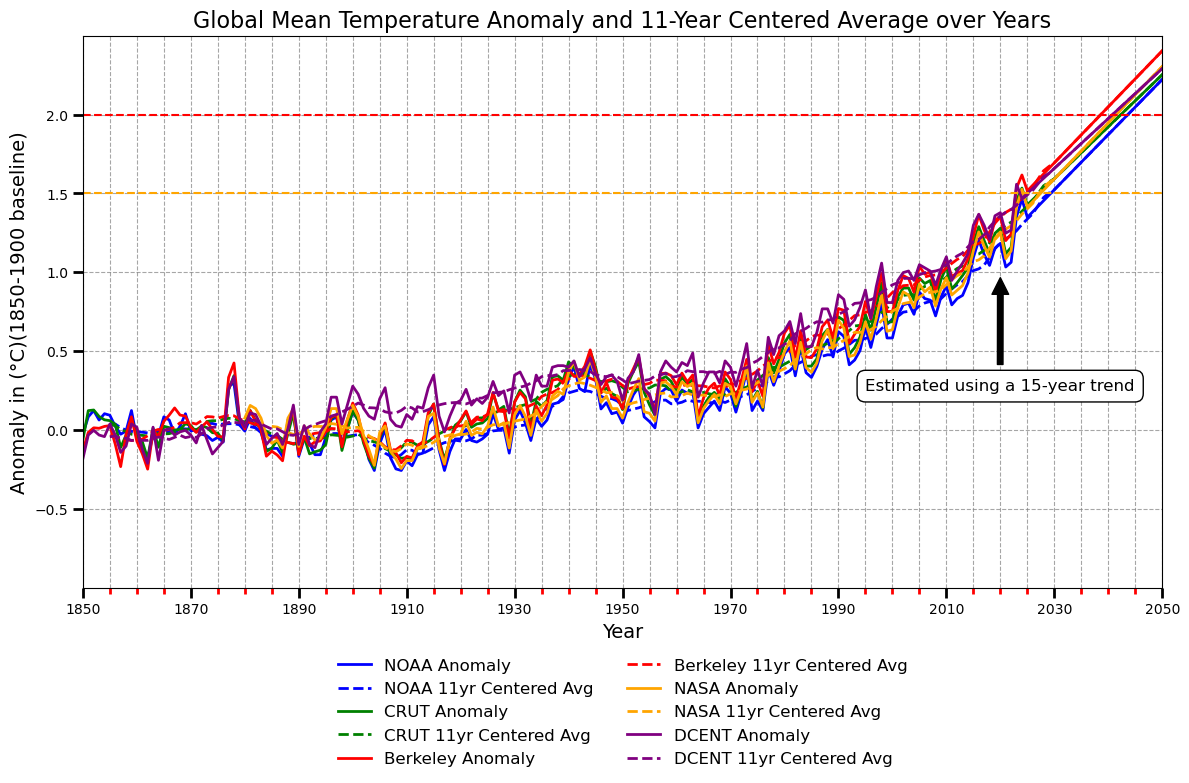

In [28]:
from matplotlib.ticker import AutoMinorLocator

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

# Plot df_noaa
plt.plot(df_noaa['Year'], df_noaa['Anomaly(1850-1900 baseline)'], label='NOAA Anomaly', color='blue', linewidth=2)
plt.plot(df_noaa['Year'], df_noaa['11yr_centered_avg'], label='NOAA 11yr Centered Avg', linestyle='--', color='blue', linewidth=2)

# Plot df_crut
plt.plot(df_crut['Time'], df_crut['Anomaly(1850-1900 baseline)'], label='CRUT Anomaly', color='green', linewidth=2)
plt.plot(df_crut['Time'], df_crut['11yr_centered_avg'], label='CRUT 11yr Centered Avg', linestyle='--', color='green', linewidth=2)

# Plot df_berkeley
plt.plot(df_berkeley['Year'], df_berkeley['Anomaly(1850-1900 baseline)'], label='Berkeley Anomaly', color='red', linewidth=2)
plt.plot(df_berkeley['Year'], df_berkeley['11yr_centered_avg'], label='Berkeley 11yr Centered Avg', linestyle='--', color='red', linewidth=2)

# Plot df_NASA
plt.plot(df_NASA['Year'], df_NASA['Anomaly(1850-1900 baseline)'], label='NASA Anomaly', color='orange', linewidth=2)
plt.plot(df_NASA['Year'], df_NASA['11yr_centered_avg'], label='NASA 11yr Centered Avg', linestyle='--', color='orange', linewidth=2)

# Plot df_DCENT
plt.plot(df_DCENT['Year'], df_DCENT['Anomaly(1850-1900 baseline)'], label='DCENT Anomaly', color='purple', linewidth=2)
plt.plot(df_DCENT['Year'], df_DCENT['11yr_centered_avg'], label='DCENT 11yr Centered Avg', linestyle='--', color='purple', linewidth=2)

# Add grid lines
plt.grid(True, linestyle='--', alpha=0.7, axis='both', which='both', color='gray')

# Move legend slightly down
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2, frameon=False, fontsize=12)

# Add a horizontal line at y=1.5
plt.axhline(y=1.5, color='orange', linestyle='--', label='y=1.5')

# Add a horizontal line at y=2.0
plt.axhline(y=2.0, color='r', linestyle='--', label='y=2.0')

# Set x-axis limit
plt.xlim([1850, 2050])
plt.ylim([-1, 2.5])

# Set x-axis ticks and labels at 5-year intervals
plt.xticks(range(1850, 2051, 20))

# Set y-axis ticks at 0.5 intervals
plt.yticks([i * 0.5 for i in range(-1, 5)])
plt.gca().xaxis.set_minor_locator(AutoMinorLocator())
plt.gca().xaxis.set_minor_locator(AutoMinorLocator())

plt.tick_params(which='both', width=2)
plt.tick_params(which='major', length=7)
plt.tick_params(which='minor', length=4, color='r')

# Add title and labels
plt.title('Global Mean Temperature Anomaly and 11-Year Centered Average over Years', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel(u'Anomaly in (\u00B0C)(1850-1900 baseline)', fontsize=14)
# Add annotation
plt.annotate('Estimated using a 15-year trend', xy=(2020, 1), xytext=(1995, 0.25),
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=12, color='black',
             bbox=dict(boxstyle='round,pad=0.5', edgecolor='black', facecolor='white'))
# Show plot
plt.tight_layout()
plt.show()

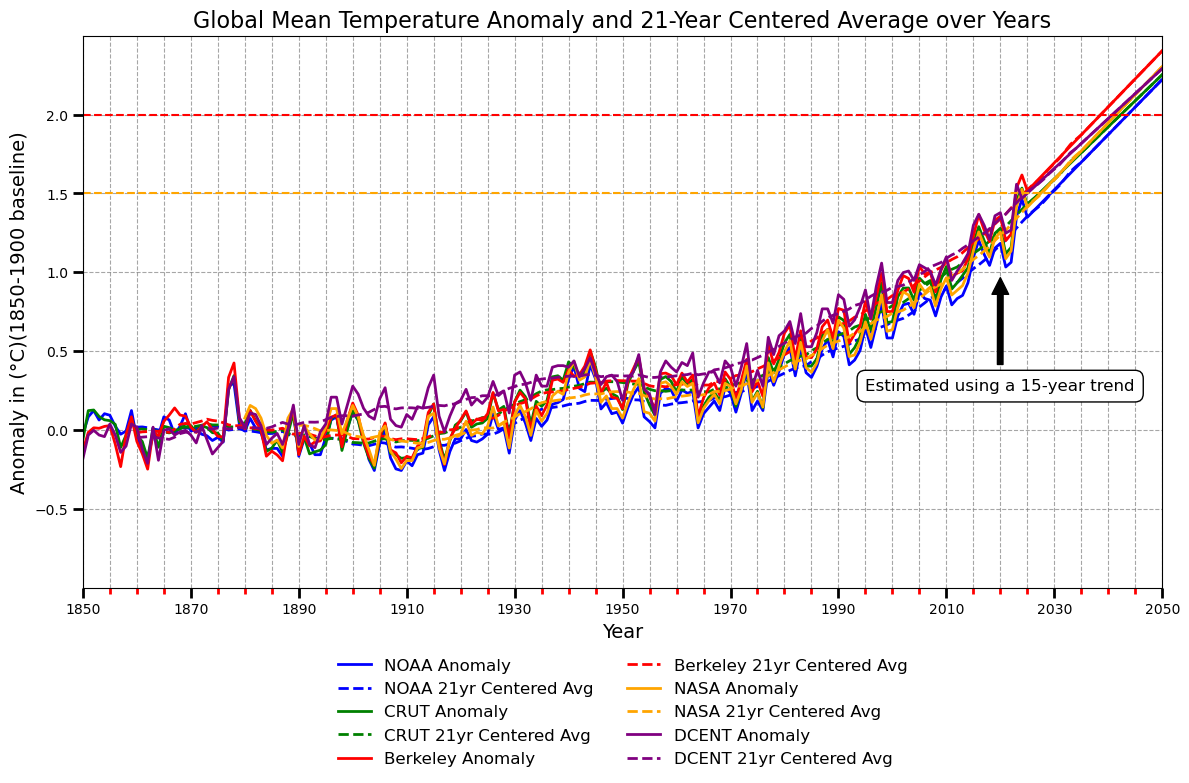

In [29]:
plt.figure(figsize=(12, 8))

# Plot df_noaa
plt.plot(df_noaa['Year'], df_noaa['Anomaly(1850-1900 baseline)'], label='NOAA Anomaly', color='blue', linewidth=2)
plt.plot(df_noaa['Year'], df_noaa['21yr_centered_avg'], label='NOAA 21yr Centered Avg', linestyle='--', color='blue', linewidth=2)

# Plot df_crut
plt.plot(df_crut['Time'], df_crut['Anomaly(1850-1900 baseline)'], label='CRUT Anomaly', color='green', linewidth=2)
plt.plot(df_crut['Time'], df_crut['21yr_centered_avg'], label='CRUT 21yr Centered Avg', linestyle='--', color='green', linewidth=2)

# Plot df_berkeley
plt.plot(df_berkeley['Year'], df_berkeley['Anomaly(1850-1900 baseline)'], label='Berkeley Anomaly', color='red', linewidth=2)
plt.plot(df_berkeley['Year'], df_berkeley['21yr_centered_avg'], label='Berkeley 21yr Centered Avg', linestyle='--', color='red', linewidth=2)

# Plot df_NASA
plt.plot(df_NASA['Year'], df_NASA['Anomaly(1850-1900 baseline)'], label='NASA Anomaly', color='orange', linewidth=2)
plt.plot(df_NASA['Year'], df_NASA['21yr_centered_avg'], label='NASA 21yr Centered Avg', linestyle='--', color='orange', linewidth=2)

# Plot df_DCENT
plt.plot(df_DCENT['Year'], df_DCENT['Anomaly(1850-1900 baseline)'], label='DCENT Anomaly', color='purple', linewidth=2)
plt.plot(df_DCENT['Year'], df_DCENT['21yr_centered_avg'], label='DCENT 21yr Centered Avg', linestyle='--', color='purple', linewidth=2)

# Add grid lines
plt.grid(True, linestyle='--', alpha=0.7, axis='both', which='both', color='gray')

# Move legend slightly down
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2, frameon=False, fontsize=12)

# Add a horizontal line at y=1.5
plt.axhline(y=1.5, color='orange', linestyle='--', label='y=1.5')

# Add a horizontal line at y=2.0
plt.axhline(y=2.0, color='r', linestyle='--', label='y=2.0')

# Set x-axis limit
plt.xlim([1850, 2050])
plt.ylim([-1, 2.5])

# Set x-axis ticks and labels at 5-year intervals
plt.xticks(range(1850, 2051, 20))

# Set y-axis ticks at 0.5 intervals
plt.yticks([i * 0.5 for i in range(-1, 5)])
plt.gca().xaxis.set_minor_locator(AutoMinorLocator())
plt.gca().xaxis.set_minor_locator(AutoMinorLocator())

plt.tick_params(which='both', width=2)
plt.tick_params(which='major', length=7)
plt.tick_params(which='minor', length=4, color='r')

# Add title and labels
plt.title('Global Mean Temperature Anomaly and 21-Year Centered Average over Years', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel(u'Anomaly in (\u00B0C)(1850-1900 baseline)', fontsize=14)
# Add annotation
plt.annotate('Estimated using a 15-year trend', xy=(2020, 1), xytext=(1995, 0.25),
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=12, color='black',
             bbox=dict(boxstyle='round,pad=0.5', edgecolor='black', facecolor='white'))
# Show plot
plt.tight_layout()
plt.show()

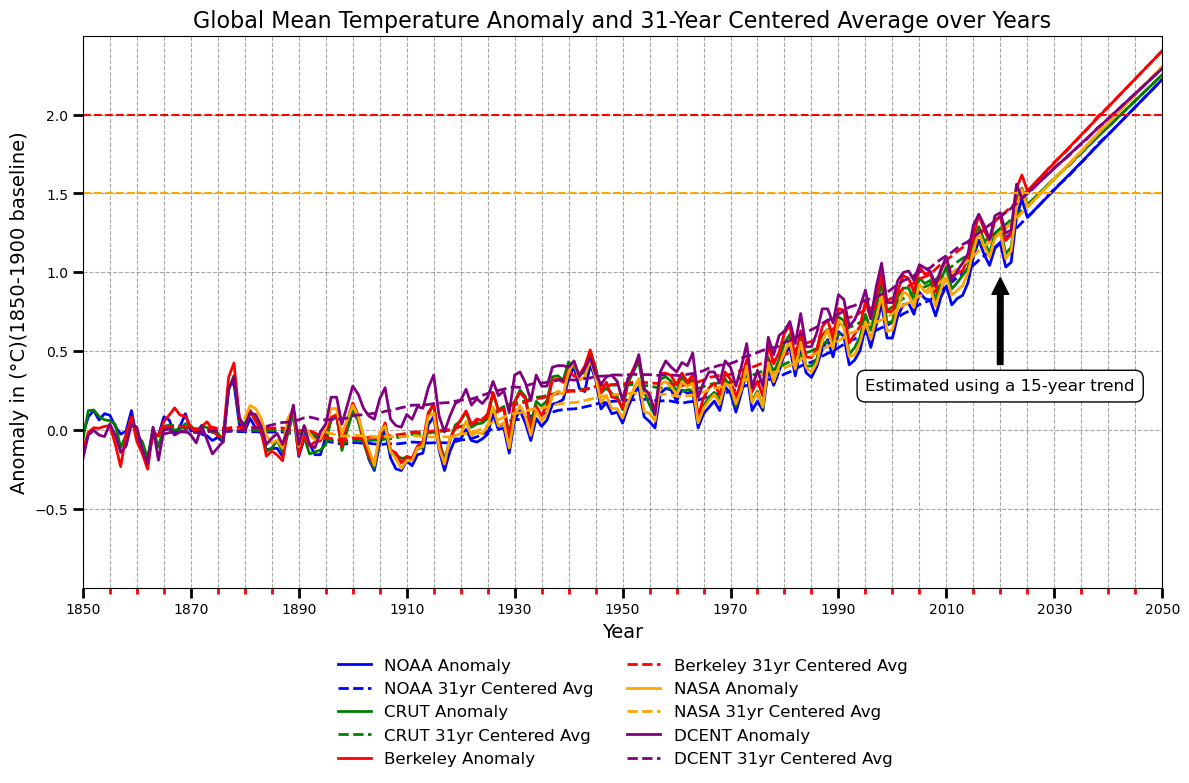

In [30]:
from matplotlib.ticker import AutoMinorLocator

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

# Plot df_noaa
plt.plot(df_noaa['Year'], df_noaa['Anomaly(1850-1900 baseline)'], label='NOAA Anomaly', color='blue', linewidth=2)
plt.plot(df_noaa['Year'], df_noaa['31yr_centered_avg'], label='NOAA 31yr Centered Avg', linestyle='--', color='blue', linewidth=2)

# Plot df_crut
plt.plot(df_crut['Time'], df_crut['Anomaly(1850-1900 baseline)'], label='CRUT Anomaly', color='green', linewidth=2)
plt.plot(df_crut['Time'], df_crut['31yr_centered_avg'], label='CRUT 31yr Centered Avg', linestyle='--', color='green', linewidth=2)

# Plot df_berkeley
plt.plot(df_berkeley['Year'], df_berkeley['Anomaly(1850-1900 baseline)'], label='Berkeley Anomaly', color='red', linewidth=2)
plt.plot(df_berkeley['Year'], df_berkeley['31yr_centered_avg'], label='Berkeley 31yr Centered Avg', linestyle='--', color='red', linewidth=2)

# Plot df_NASA
plt.plot(df_NASA['Year'], df_NASA['Anomaly(1850-1900 baseline)'], label='NASA Anomaly', color='orange', linewidth=2)
plt.plot(df_NASA['Year'], df_NASA['31yr_centered_avg'], label='NASA 31yr Centered Avg', linestyle='--', color='orange', linewidth=2)

# Plot df_DCENT
plt.plot(df_DCENT['Year'], df_DCENT['Anomaly(1850-1900 baseline)'], label='DCENT Anomaly', color='purple', linewidth=2)
plt.plot(df_DCENT['Year'], df_DCENT['31yr_centered_avg'], label='DCENT 31yr Centered Avg', linestyle='--', color='purple', linewidth=2)

# Add grid lines
plt.grid(True, linestyle='--', alpha=0.7, axis='both', which='both', color='gray')

# Move legend slightly down
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2, frameon=False, fontsize=12)

# Add a horizontal line at y=1.5
plt.axhline(y=1.5, color='orange', linestyle='--', label='y=1.5')

# Add a horizontal line at y=2.0
plt.axhline(y=2.0, color='r', linestyle='--', label='y=2.0')

# Set x-axis limit
plt.xlim([1850, 2050])
plt.ylim([-1, 2.5])

# Set x-axis ticks and labels at 5-year intervals
plt.xticks(range(1850, 2051, 20))

# Set y-axis ticks at 0.5 intervals
plt.yticks([i * 0.5 for i in range(-1, 5)])
plt.gca().xaxis.set_minor_locator(AutoMinorLocator())
plt.gca().xaxis.set_minor_locator(AutoMinorLocator())

plt.tick_params(which='both', width=2)
plt.tick_params(which='major', length=7)
plt.tick_params(which='minor', length=4, color='r')

# Add title and labels
plt.title('Global Mean Temperature Anomaly and 31-Year Centered Average over Years', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel(u'Anomaly in (\u00B0C)(1850-1900 baseline)', fontsize=14)

# Add annotation
plt.annotate('Estimated using a 15-year trend', xy=(2020, 1), xytext=(1995, 0.25),
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=12, color='black',
             bbox=dict(boxstyle='round,pad=0.5', edgecolor='black', facecolor='white'))

# Show plot
plt.tight_layout()
plt.show()